In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from portein.plot import Pymol, Illustrate
import prody as pd
from portein import get_best_transformation

/Users/jay/mambaforge/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [4]:
pdb_id = "4HSI"
pdb = pd.parsePDB(pdb_id, biomol=True)[0]
pd.writePDB(f"{pdb_id}.pdb", pdb)
coords = pdb.select("protein and calpha").getCoords()
matrix = get_best_transformation(coords)
pdb = pd.applyTransformation(pd.Transformation(matrix), pdb)
pd.writePDB(f"{pdb_id}_rotated.pdb", pdb)

/Users/jay/PycharmProjects/test_template/portein/portein/rotate.py:111: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  matrix[:3, 0] = np.dot(quaternion, i)
/Users/jay/PycharmProjects/test_template/portein/portein/rotate.py:111: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  matrix[:3, 0] = np.dot(quaternion, i)
/Users/jay/PycharmProjects/test_template/portein/portein/rotate.py:87: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  theta = np.arccos(np.dot(new_axis, k))
/Users/jay/PycharmProjects/test_template/portein/portein/rotate.py:87: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  theta = np.arccos(np.dot(new_axis, k))
/Users/jay/PycharmProjects/test_template/portein/portein/rot

'4HSI_rotated.pdb'

In [14]:
illustrate_class = Illustrate(f"{pdb_id}_rotated.pdb", 
                              "/Users/jay/Downloads/illustrate", 
                              output_prefix="illustrate", 
                              # highlight_residues={"A": {"black": list(range(1,60))}},
                              center="aut",
                              chain_colormap="Set3",
                              padding=(-0, -0),
                              contour_ikernel=3,
                              fog_front_transparency=0.4,
                              fog_back_transparency=0.4,
                              residue_difference=1000,
                              sidechain_transparency=1.,
                            #   carbon_radius=1.9,
                            #   sidechain_radius=1.9,
                              shadow=True
)
illustrate_class.run()

In [6]:
illustrate_class.width, illustrate_class.height

(876, 1700)

In [26]:
pymol_class = Pymol(f"{pdb_id}_rotated.pdb", 
                    # highlight_residues={"A": {None: [1, 2, 3]}},
                    width=illustrate_class.width, 
                    height=illustrate_class.height, 
                    orient=False, chain_colormap="Set3",
                    buffer=5
                    )
# pymol_class.figure_order = pymol_class.figure_order[1:] # to remove the surface layer

In [27]:
pymol_class.draw_protein()

 Ray: render time: 48.44 sec. = 74.3 frames/hour (832.85 sec. accum.).
 Ray: render time: 7.77 sec. = 463.1 frames/hour (849.18 sec. accum.).
 Ray: render time: 0.35 sec. = 10244.6 frames/hour (849.88 sec. accum.).


In [10]:
from PIL import Image
from portein import plot

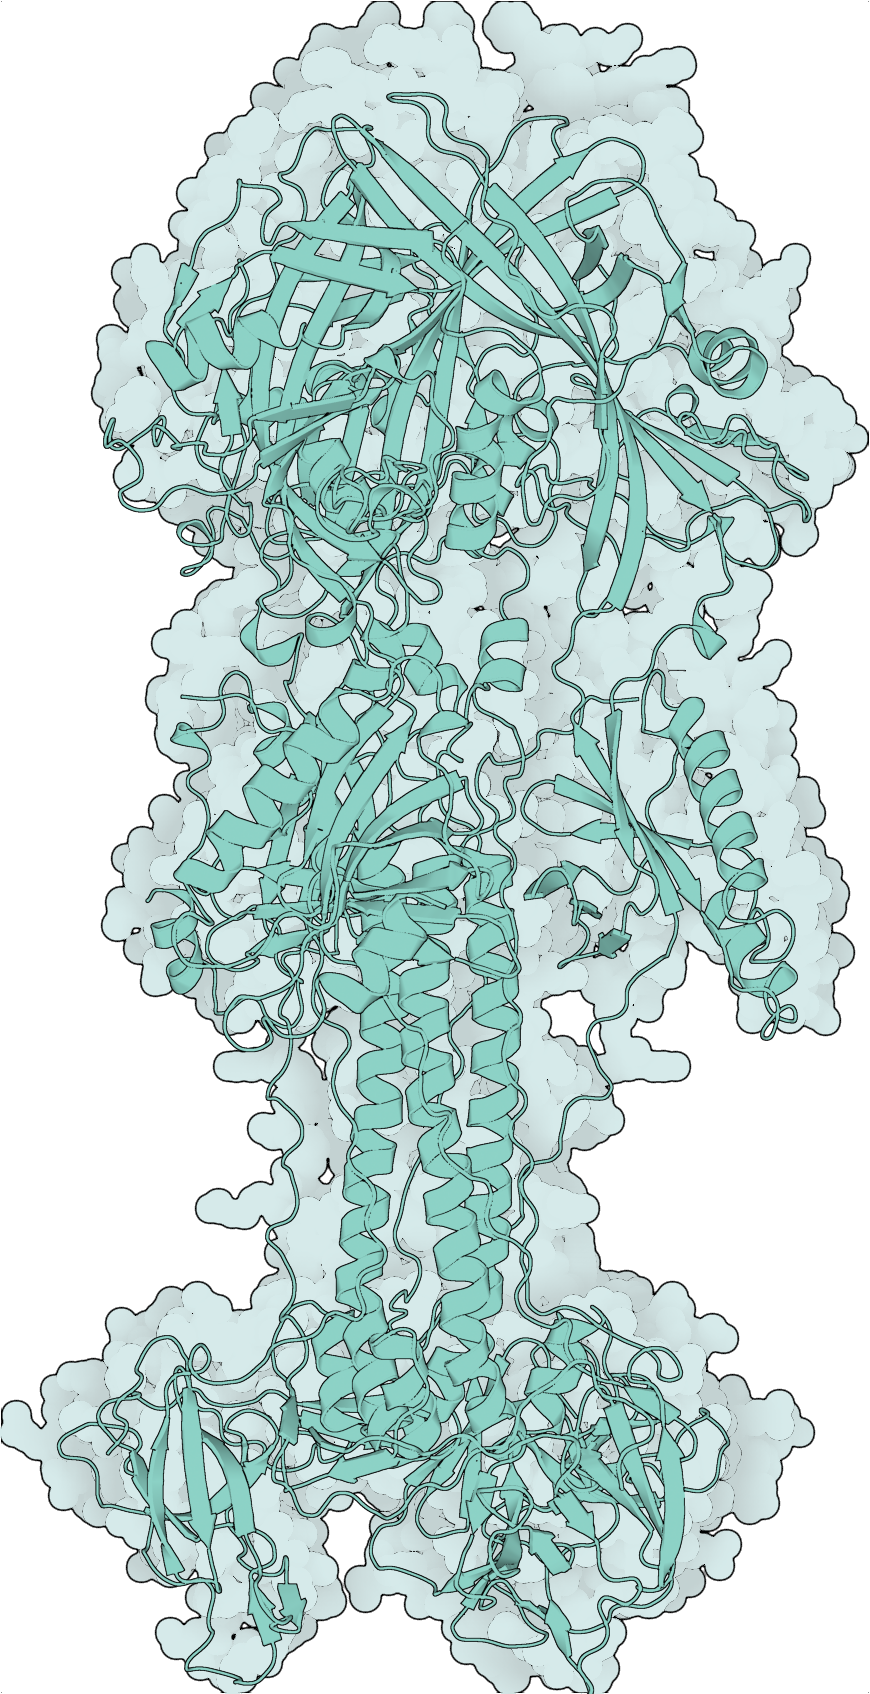

In [18]:
img1 = Image.open("illustrate.png").convert("RGBA")
img2 = Image.open(f"{pdb_id}_rotated.png")
# img1.putalpha(255)
# img1 = plot.put_alpha(img1, 0.5)
background = Image.new(img1.mode, img1.size, "white")
background.alpha_composite(img1)
background.alpha_composite(img2)
background


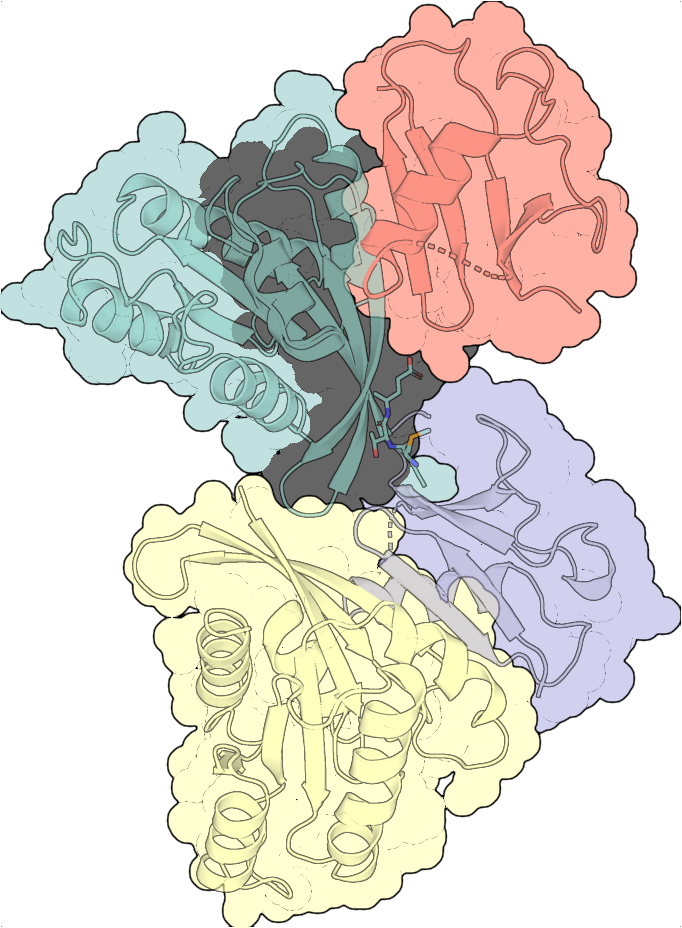

In [222]:
img1 = Image.open("7lc2_illustrate.png").convert("RGBA")
img2 = Image.open("7lc2_rotated.png")
# img1.putalpha(255)
# img1 = plot.put_alpha(img1, 0.5)
background = Image.new(img1.mode, img1.size, "white")
background.alpha_composite(img1)
background.alpha_composite(img2)
img1_copy = plot.put_alpha(img1.copy(), 0.5)
background.alpha_composite(img1_copy)
background.alpha_composite(plot.put_alpha(img2.copy(), 0.8))
background
